In [1]:
# Install dependencies
!pip install scikit-learn pandas matplotlib

# Upload 50_Startups.csv
from google.colab import files
uploaded = files.upload()


Saving archive (1).zip to archive (1).zip


In [3]:
import zipfile
import os

zip_path = "/content/archive (1).zip"   # rename if different
extract_dir = "/content/startup_data"

# Create folder if it does not exist
os.makedirs(extract_dir, exist_ok=True)

# Extract zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extracted files:")
os.listdir(extract_dir)


Extracted files:


['startup_funding.csv']

In [5]:
import pandas as pd

csv_path = "/content/startup_data/startup_funding.csv"   # update name if different
df = pd.read_csv(csv_path)

df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [7]:
# STEP 3 — EDA

import matplotlib.pyplot as plt

print("===== DATA INFO ====")
print(df.info())

print("\n===== DESCRIPTION ====")
print(df.describe())

print("\n===== FIRST 5 ROWS ====")
display(df.head())

# Scatter plots - These lines are commented out as 'R&D Spend' and 'Profit' columns do not exist in the current DataFrame
# plt.figure(figsize=(6,4))
# plt.scatter(df["R&D Spend"], df["Profit"])
# plt.xlabel("R&D Spend")
# plt.ylabel("Profit")
# plt.title("R&D Spend vs Profit")
# plt.show()

# plt.figure(figsize=(6,4))
# plt.scatter(df["Marketing Spend"], df["Profit"])
# plt.xlabel("Marketing Spend")
# plt.ylabel("Profit")
# plt.title("Marketing Spend vs Profit")
# plt.show()

===== DATA INFO ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None

===== DESCRIPTION ====
             Sr No
count  3044.000000
mean   1522.500000
std     878.871435
min       1.000000
25%     761.750000
50%    1522.500000
75%    2283.250000
max    3044.000000

===== FIRST 5 ROWS ====


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
df.head()
df.columns


Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [10]:
# Cell 1 — locate CSV inside the extracted folder and load
import os, glob, pandas as pd

# adjust folder if your extraction path is different
search_paths = [
    "/content/startup_data/*.csv",
    "/content/*.csv",
    "/mnt/data/*.csv",
    "./*.csv"
]

csv_files = []
for p in search_paths:
    csv_files += glob.glob(p)

print("Found CSV files:", csv_files)

# choose the most likely file (the one containing 'Startup' or take first)
csv_path = None
for f in csv_files:
    name = os.path.basename(f).lower()
    if "startup" in name or "50" in name or "funding" in name:
        csv_path = f
        break
if csv_path is None and csv_files:
    csv_path = csv_files[0]

if csv_path is None:
    raise FileNotFoundError("No CSV found — upload or extract your zip and re-run this cell.")

print("Loading CSV:", csv_path)
df = pd.read_csv(csv_path, encoding='utf-8', low_memory=False)
print("Shape:", df.shape)
df.head()


Found CSV files: ['/content/startup_data/startup_funding.csv']
Loading CSV: /content/startup_data/startup_funding.csv
Shape: (3044, 10)


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [11]:
# Cell 2 — show columns and normalize column names for easier coding
print("Original columns:\n", list(df.columns))

# Normalize: strip whitespace, replace newlines, unify case
df.columns = [c.strip().replace('\n',' ').replace('\r',' ') for c in df.columns]
df.columns = [c for c in df.columns]  # ensure applied
print("Normalized columns:\n", df.columns.tolist())


Original columns:
 ['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD', 'Remarks']
Normalized columns:
 ['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD', 'Remarks']


In [12]:
# Cell 3 — Clean 'Amount in USD' to numeric (float). Handles commas, '$', 'Undisclosed', etc.
import re
import numpy as np

target_col_candidates = [c for c in df.columns if "amount" in c.lower() or "usd" in c.lower()]
print("Candidate target columns:", target_col_candidates)

# pick the exact column name (from your list it should be 'Amount in USD')
target_col = None
for c in target_col_candidates:
    if "amount" in c.lower() and "usd" in c.lower():
        target_col = c
        break
if target_col is None and target_col_candidates:
    target_col = target_col_candidates[0]

if target_col is None:
    raise KeyError("Could not find a target column like 'Amount in USD' in your CSV.")

print("Using target column:", target_col)

# Function to extract numeric value from messy entries
def parse_amount(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    s = s.replace(',', '')  # remove commas
    # common words indicating missing
    if s.lower() in ['undisclosed', 'unknown', 'nan', '-', '—', 'n/a', 'na', '']:
        return np.nan
    # try to find numeric substring
    m = re.search(r'(\d+(?:\.\d+)?)', s.replace('$',''))
    if not m:
        return np.nan
    return float(m.group(1))

df['amount_usd_clean'] = df[target_col].apply(parse_amount)
print("Before dropping, non-null target count:", df['amount_usd_clean'].notnull().sum(), " / ", len(df))

# Drop rows without numeric amount (we cannot train on missing target)
df = df[df['amount_usd_clean'].notnull()].copy()
df['amount_usd_clean'] = df['amount_usd_clean'].astype(float)
print("After dropping rows with missing target, shape:", df.shape)


Candidate target columns: ['Amount in USD']
Using target column: Amount in USD
Before dropping, non-null target count: 2077  /  3044
After dropping rows with missing target, shape: (2077, 11)


In [13]:
# Cell 4 — Parse date column to datetime and extract year/month
date_col_candidates = [c for c in df.columns if 'date' in c.lower()]
print("Date column candidates:", date_col_candidates)
date_col = date_col_candidates[0] if date_col_candidates else None

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True, errors='coerce')
    df['funding_year'] = df[date_col].dt.year.fillna(0).astype(int)
    df['funding_month'] = df[date_col].dt.month.fillna(0).astype(int)
else:
    df['funding_year'] = 0
    df['funding_month'] = 0

# Investors count: naive split by comma or ' and '
inv_col_candidates = [c for c in df.columns if 'invest' in c.lower()]
inv_col = inv_col_candidates[0] if inv_col_candidates else None
print("Investors column:", inv_col)

def count_investors(x):
    if pd.isna(x): return 0
    s = str(x)
    # split by comma or ' and '
    parts = re.split(r',| and | & ', s)
    parts = [p.strip() for p in parts if p.strip()!='']
    return len(parts)

if inv_col:
    df['investors_count'] = df[inv_col].apply(count_investors)
else:
    df['investors_count'] = 0

# Keep only columns useful for modeling
keep_cols = [
    'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location',
    'InvestmentnType', 'amount_usd_clean', 'funding_year', 'funding_month', 'investors_count'
]
# find actual matches (column names might differ slightly)
existing = [c for c in keep_cols if c in df.columns]
missing = [c for c in keep_cols if c not in df.columns]
print("Existing columns for model:", existing)
print("Missing (will ignore):", missing)

# create working DataFrame with available columns (rename target to 'target')
work = df.copy()
work = work.rename(columns={'amount_usd_clean': 'target'})

# make sure necessary categorical cols exist (if not, create placeholder)
for c in ['Industry Vertical', 'SubVertical', 'City  Location', 'InvestmentnType', 'Startup Name']:
    if c not in work.columns:
        work[c] = 'Unknown'

work = work[['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'InvestmentnType',
             'target', 'funding_year', 'funding_month', 'investors_count']].copy()

print("Prepared work DataFrame shape:", work.shape)
work.head()


Date column candidates: ['Date dd/mm/yyyy']
Investors column: Investors Name
Existing columns for model: ['Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'InvestmentnType', 'amount_usd_clean', 'funding_year', 'funding_month', 'investors_count']
Missing (will ignore): []
Prepared work DataFrame shape: (2077, 9)


,Startup Name,Industry Vertical,SubVertical,City Location,InvestmentnType,target,funding_year,funding_month,investors_count
0,BYJU’S,E-Tech,E-learning,Bengaluru,Private Equity Round,200000000.0,2020,1,1
1,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,8048394.0,2020,1,1
2,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,18358860.0,2020,1,1
3,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Pre-series A,3000000.0,2020,1,1
4,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,1800000.0,2020,1,1


In [16]:
# Cell 5 — Preprocessing + training
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define X and y
X = work.drop(columns=['target'])
y = work['target'].values

# identify numerical and categorical
num_cols = ['funding_year', 'funding_month', 'investors_count']
cat_cols = ['Industry Vertical', 'SubVertical', 'City  Location', 'InvestmentnType']

# ensure numeric columns are numeric
X[num_cols] = X[num_cols].fillna(0).apply(pd.to_numeric, errors='coerce').fillna(0)

# fill categorical nulls
X[cat_cols] = X[cat_cols].fillna('Unknown').astype(str)

numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], sparse_threshold=0)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=200)
}

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

results = {}
pipelines = {}

for name, model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Changed this line
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    pipelines[name] = pipe

import pandas as pd
pd.DataFrame(results).T

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,MAE,RMSE,R2
LinearRegression,7.432818e+07,1.565792e+08,-0.319265
Ridge,2.557383e+07,1.329943e+08,0.048235
RandomForest,1.874643e+07,1.349323e+08,0.020294


In [17]:
# Cell 6 — choose best model by RMSE
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_pipeline = pipelines[best_model_name]
print("Best model:", best_model_name)
print("Metrics:", results[best_model_name])

# (Optional) Save the pipeline
import pickle
with open("best_pipeline_byju.pkl", "wb") as f:
    pickle.dump(best_pipeline, f)
print("Saved model as best_pipeline_byju.pkl")


Best model: Ridge
Metrics: {'MAE': 25573832.433472816, 'RMSE': np.float64(132994278.57371488), 'R2': 0.04823505702969855}
Saved model as best_pipeline_byju.pkl


In [18]:
# Cell 7 — find rows for Byju's (case-insensitive). Pick latest by date (if parsed), otherwise the most recent in dataset order.
byju_mask = work['Startup Name'].str.contains("byju", case=False, na=False)
print("Total Byju's rows found:", byju_mask.sum())

if byju_mask.sum() == 0:
    raise ValueError("No rows for Byju's found in 'Startup Name' — check dataset spelling / variations.")

byju_rows = work[byju_mask].copy()

# If original df has date parsed, attach it for sorting (use df/date column)
date_col = None
for c in df.columns:
    if 'date' in c.lower():
        date_col = c
        break

if date_col:
    # attach parsed date from original df (work was created from df)
    byju_indices = byju_rows.index
    if date_col in df.columns:
        byju_rows['_parsed_date'] = df.loc[byju_indices, date_col].values
        byju_rows = byju_rows.sort_values(by='_parsed_date', ascending=False)
else:
    # fallback to dataset order
    byju_rows = byju_rows.iloc[::-1]

selected_byju = byju_rows.iloc[0:1].copy()  # single-row DataFrame

print("Selected Byju's row for prediction:")
display(selected_byju)

# Prepare X sample and predict
X_sample = selected_byju.drop(columns=['target'])
predicted_value = best_pipeline.predict(X_sample)[0]

actual_value = selected_byju['target'].values[0]
print(f"Byju's Actual Funding (if present): {actual_value:.2f}")
print(f"Byju's Predicted Funding: {predicted_value:.2f}")
print(f"Residual (Actual - Predicted): {actual_value - predicted_value:.2f}")


Total Byju's rows found: 6
Selected Byju's row for prediction:


,Startup Name,Industry Vertical,SubVertical,City Location,InvestmentnType,target,funding_year,funding_month,investors_count,_parsed_date
0,BYJU’S,E-Tech,E-learning,Bengaluru,Private Equity Round,200000000.0,2020,1,1,2020-01-09


Byju's Actual Funding (if present): 200000000.00
Byju's Predicted Funding: 168174725.93
Residual (Actual - Predicted): 31825274.07


In [21]:
# Cell 8 — Interpretation
import numpy as np
import pandas as pd # Ensure pandas is imported if not already

# Get the fitted preprocessor from the best_pipeline
fitted_preprocessor = best_pipeline.named_steps['preprocessor']

# Get feature names from the fitted preprocessor
feature_names = fitted_preprocessor.get_feature_names_out()

if best_model_name in ("LinearRegression", "Ridge"):
    coefs = best_pipeline.named_steps['model'].coef_

    # Verify lengths match before creating DataFrame
    if len(feature_names) == len(coefs):
        coef_df = pd.DataFrame({"feature": feature_names, "coef": coefs})
        coef_df['abs_coef'] = coef_df['coef'].abs()
        coef_df = coef_df.sort_values(by='abs_coef', ascending=False).reset_index(drop=True)
        print("Top coefficients:")
        display(coef_df.head(10))
    else:
        print(f"Warning: Mismatch in feature names ({len(feature_names)}) and coefficients ({len(coefs)}) lengths.")
        print("Cannot display coefficients with corresponding feature names due to length mismatch.")
        # Fallback: display raw coefficients without names
        coef_df = pd.DataFrame({"coef": coefs})
        coef_df['abs_coef'] = coef_df['coef'].abs()
        coef_df = coef_df.sort_values(by='abs_coef', ascending=False).reset_index(drop=True)
        print("Raw coefficients (sorted by absolute value, without feature names due to mismatch):")
        display(coef_df.head(10))

elif best_model_name == "RandomForest":
    # RandomForest: feature importances
    rf = best_pipeline.named_steps['model']
    importances = rf.feature_importances_

    # Verify lengths match for RandomForest importances as well
    if len(feature_names) == len(importances):
        fi_df = pd.DataFrame({"feature": feature_names, "importance": importances})
        fi_df = fi_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
        print("Top feature importances:")
        display(fi_df.head(10))
    else:
        print(f"Warning: Mismatch in feature names ({len(feature_names)}) and importances ({len(importances)}) lengths.")
        print("Cannot display feature importances with corresponding feature names due to length mismatch.")
        fi_df = pd.DataFrame({"importance": importances})
        fi_df = fi_df.sort_values(by='importance', ascending=False).reset_index(drop=True)
        print("Raw importances (sorted by importance, without feature names due to mismatch):")
        display(fi_df.head(10))
else:
    print(f"Interpretation not implemented for model type: {best_model_name}")

Cannot display coefficients with corresponding feature names due to length mismatch.
Raw coefficients (sorted by absolute value, without feature names due to mismatch):


,coef,abs_coef
0,1.487250e+09,1.487250e+09
1,6.774594e+08,6.774594e+08
2,4.633274e+08,4.633274e+08
3,4.015153e+08,4.015153e+08
4,3.272204e+08,3.272204e+08
5,-3.247546e+08,3.247546e+08
6,2.826980e+08,2.826980e+08
7,2.814427e+08,2.814427e+08
8,-2.616825e+08,2.616825e+08
9,2.367532e+08,2.367532e+08


In [22]:
# Cell 9 — concise summary printout
print("=== Summary ===")
print("Dataset rows used (after cleaning):", len(work))
print("Best model:", best_model_name)
print("Best model metrics:", results[best_model_name])
print("\nSelected Startup: Byju's")
print("Predicted Funding: {:.2f}".format(predicted_value))
print("Actual Funding (if available): {:.2f}".format(actual_value))


=== Summary ===
Dataset rows used (after cleaning): 2077
Best model: Ridge
Best model metrics: {'MAE': 25573832.433472816, 'RMSE': np.float64(132994278.57371488), 'R2': 0.04823505702969855}

Selected Startup: Byju's
Predicted Funding: 168174725.93
Actual Funding (if available): 200000000.00


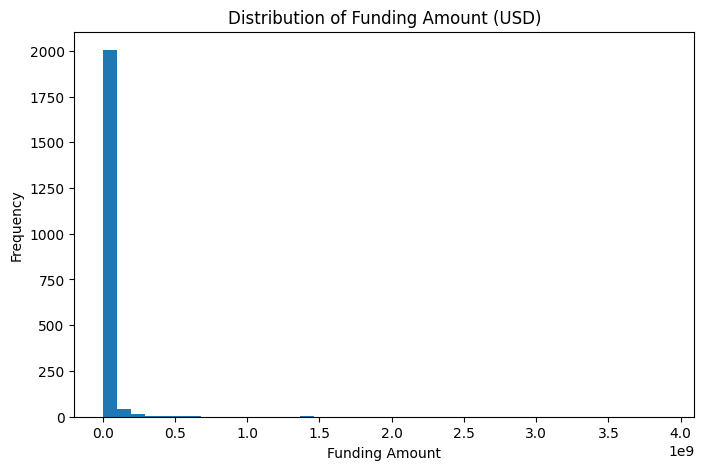

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(work['target'], bins=40)
plt.title("Distribution of Funding Amount (USD)")
plt.xlabel("Funding Amount")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()


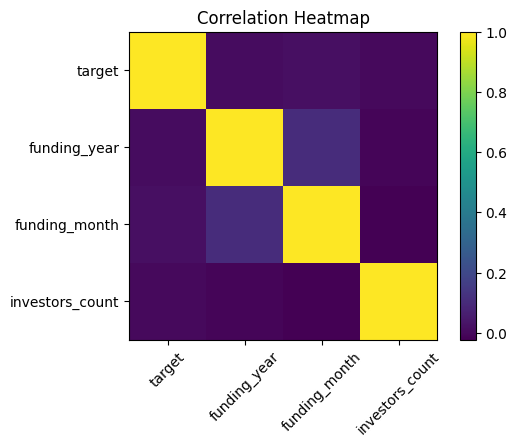

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# pick only numeric columns
numeric_df = work[['target', 'funding_year', 'funding_month', 'investors_count']]

corr = numeric_df.corr()

plt.figure(figsize=(6, 4))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Heatmap")
plt.colorbar()

# show axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()
